In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re
from datetime import datetime as dt

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [6]:
df['line_total'] = (df['line_total']).replace('[\$]', '', regex=True)

In [7]:
df['price'] = (df['price']).replace('[\$]', '', regex=True)

In [8]:
df["price"] = pd.to_numeric(df["price"])

In [9]:
df["line_total"] = pd.to_numeric(df["line_total"])

In [10]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [11]:
df[df.duplicated()].shape[0]

538

In [12]:
df = df[df['name'].isnull() == False]

In [13]:
df.dropna()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
7,10002,"""ICE CREAM"" Earl Gray",2018-01-01 12:23:09,0.5,3,1.5
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.5,3,4.5
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:59,2.5,2,5.0
10,10004,"""BEVERAGE"" Espresso",2018-01-01 13:22:59,2.5,1,2.5
11,10004,"""ICE CREAM"" Mint Chip",2018-01-01 13:22:59,1.5,2,3.0


In [14]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [15]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [16]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

29

In [17]:
df[df['line_total'] < 0].shape[0]

282

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [18]:
df[df['line_total'] != df['price'] * df['quantity']] = df['price'] * df['quantity']

ValueError: Must have equal len keys and value when setting with an iterable

In [19]:
df = df[df['line_total'] >= 0]

In [20]:
df.describe()

,order_id,price,quantity,line_total
count,28152.000000,28152.000000,28152.000000,28152.000000
mean,14991.953396,2.510319,2.001705,5.027707
std,2888.586572,1.059779,0.819506,3.086223
min,10000.000000,0.500000,1.000000,0.000000
25%,12500.750000,1.500000,1.000000,2.500000
50%,14967.500000,2.500000,2.000000,4.500000
75%,17506.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [21]:
s = str(df['name']).split('"')
c = s[1]
n = s[2]
df['category'] = c
df['name'] = n

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [45]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge\n1,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge\n1,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Peanut Fudge\n1,2018-01-01 12:14:54,2.5,2,5.0,ICE CREAM
4,10001,Peanut Fudge\n1,2018-01-01 12:14:54,3.5,1,3.5,ICE CREAM
5,10002,Peanut Fudge\n1,2018-01-01 12:23:09,3.0,1,3.0,ICE CREAM


#### Analysis, finally!

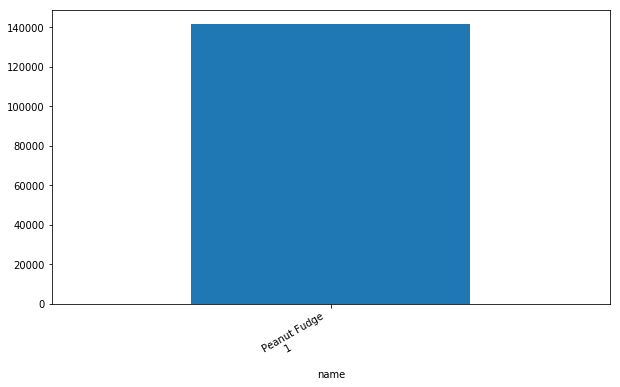

In [46]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()